In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

df = pd.read_csv("C:/Users/Daniel Lara/Downloads/2008.csv",nrows = 1e6)
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])]
df.head(500000)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2008,1,31,4,1429.0,1330,1946.0,1900,AA,1144,...,14.0,11.0,0,NaN,0,0.0,0.0,24.0,0.0,22.0
499996,2008,1,1,2,1223.0,1125,1453.0,1350,AA,1145,...,4.0,17.0,0,NaN,0,0.0,24.0,5.0,0.0,34.0
499997,2008,1,2,3,1150.0,1125,1408.0,1350,AA,1145,...,2.0,14.0,0,NaN,0,17.0,0.0,0.0,0.0,1.0
499998,2008,1,3,4,1122.0,1125,1338.0,1350,AA,1145,...,2.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [2]:
times = []

for i in np.arange(len(df)):
    times.append(datetime.datetime(year = 2008, month= df.loc[i,"Month"], day = df.loc[i,"DayofMonth"]))
    
print("termine")

termine


In [3]:
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [4]:
df["Time"] = times

In [8]:
data = df.groupby( by = ["Time"], as_index=False)[["DepDelay","ArrDelay"]].mean()
data.head()

,Time,DepDelay,ArrDelay
0,2008-01-01,19.013954,19.211324
1,2008-01-02,22.165289,21.230027
2,2008-01-03,16.112306,13.831777
3,2008-01-04,13.758581,11.558525
4,2008-01-05,17.386419,15.903450


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

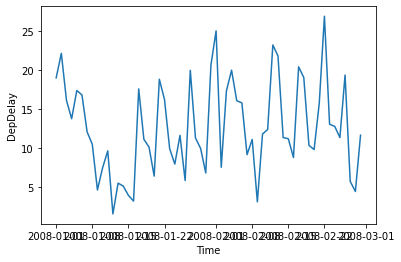

In [13]:
sns.lineplot(x = data["Time"], y = data["DepDelay"])

In [14]:
data = df.groupby( by = ["Time"])[["DepDelay","ArrDelay"]].mean()
data.head()

,DepDelay,ArrDelay
Time,,
2008-01-01,19.013954,19.211324
2008-01-02,22.165289,21.230027
2008-01-03,16.112306,13.831777
2008-01-04,13.758581,11.558525
2008-01-05,17.386419,15.903450


<AxesSubplot:xlabel='Time'>

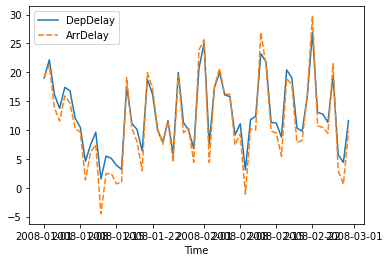

In [15]:
sns.lineplot(data = data)

In [27]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])]

In [28]:
times1 = []

for i in df2.index:
    times1.append(datetime.datetime(year = 2008, month= df2.loc[i,"Month"], day = df2.loc[i,"DayofMonth"]))
    

In [29]:
df2["Time"] = times1

C:\Users\Daniel Lara\AppData\Local\Temp\ipykernel_4404\1933823240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Time"] = times1


<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

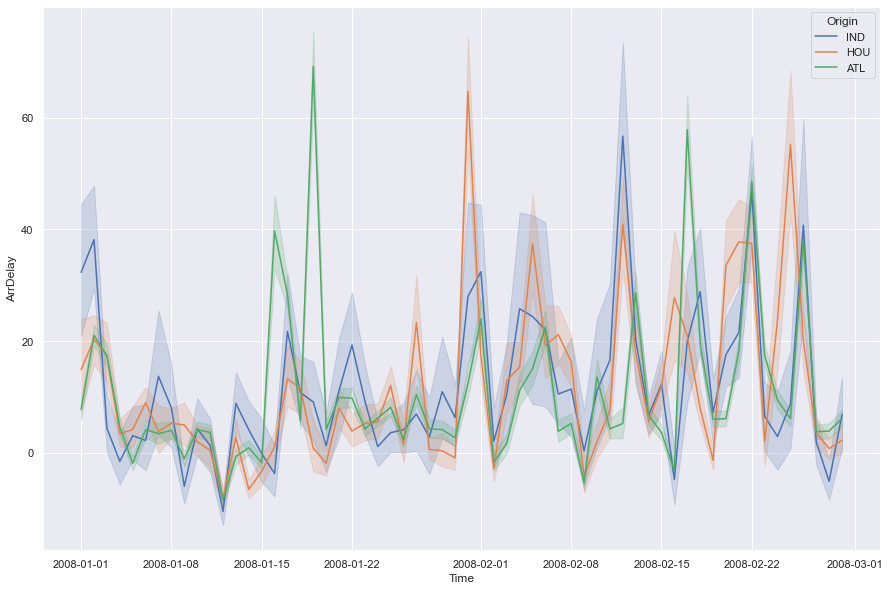

In [26]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Time",y="ArrDelay",hue="Origin",data=df2)